# RNA Seq Analysis with Python
#### The RNA-Seq data here are all from oligodendrocytes, downloaded using [ARCHS4](https://amp.pharm.mssm.edu/archs4/index.html). The data come from various papers
#### the goals will be to:
1. get some data
2. count some genes and transcripts
3. make a t-SNE visualization
4. ???

#### imports of things we will need for this notebook

In [2]:
import numpy as np
import os,sys,glob
import pandas as pd
import seaborn as sns

load some RNASeq data. 

In [4]:
df = pd.read_csv('/Users/danieljdenman/gigantum/danieljdenman/danieljdenman/labbooks/nrsc7601/input/Oligodendrocyte_expression_matrix.tsv',sep="\t")

In [5]:
df.head()

,GSM1930866,GSM1930875,GSM1930871,GSM1930867,GSM1930870,GSM1930879,GSM1930872,GSM1930869,GSM1930877,GSM1930865,...,GSM2089670,GSM2083751,GSM2089663,GSM2089669,GSM2089668,GSM2089664,GSM2186592,GSM2186593,GSM2186591,GSM2186594
0610007P14Rik,1779,1853,2696,1660,3120,2199,2410,1908,1309,1901,...,4751,830,5328,4560,6353,5937,1840,1664,1507,1897
0610009B22Rik,1103,1356,1297,950,1512,1206,1382,1194,1013,1079,...,1144,214,745,1149,1213,938,239,198,214,267
0610009L18Rik,94,96,162,79,170,109,178,82,76,61,...,107,7,65,105,113,69,62,55,53,70
0610009O20Rik,1874,2007,2288,1919,2439,2331,2366,1915,1551,2022,...,2609,1025,2272,2545,2559,2411,884,660,671,816
0610010F05Rik,1483,1432,1330,1271,1215,1378,1461,1442,1577,1215,...,2207,945,2703,2283,2463,2794,959,696,826,936


In [57]:
df_sub = df.sample(frac=0.01, replace=False, random_state=3)

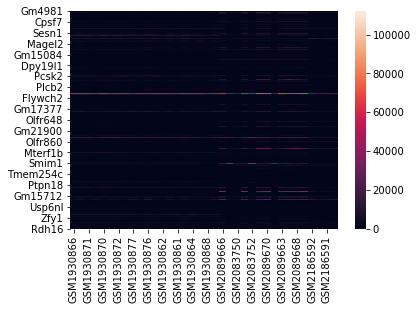

In [58]:
sns.heatmap(df_sub)

In [44]:
df[df.index=='Myc'].values[0]

array([  187,   191,   105,   205,    79,   123,   119,   198,   289,
         124,   263,    87,   113,   139,    76,   109,   127,    98,
          88,   292,  5858,   405,  1505,  5636,   553,  6621,  5967,
         322, 12217,  5847,  6463,  6622,  1026,   814,   809,  1095])

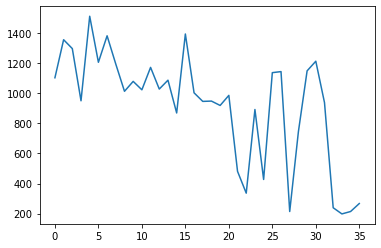

In [47]:
sns.lineplot(x=np.arange(df.shape[1]), y=df[df.index=='0610009B22Rik'].values[0])

look up an mRNA that should be expressed in oligodendrocytes. what's the reference? enter it in a Markdown cell below:

In [ ]:
#change this cell to markdown and enter the gene name and reference 

find the gene in outheer data frame

how many of the datasets is it expressed in?

In [64]:
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [73]:
data_subset = df#.sample(10000)

In [74]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 32544 samples in 0.346s...
[t-SNE] Computed neighbors for 32544 samples in 18.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32544
[t-SNE] Computed conditional probabilities for sample 2000 / 32544
[t-SNE] Computed conditional probabilities for sample 3000 / 32544
[t-SNE] Computed conditional probabilities for sample 4000 / 32544
[t-SNE] Computed conditional probabilities for sample 5000 / 32544
[t-SNE] Computed conditional probabilities for sample 6000 / 32544
[t-SNE] Computed conditional probabilities for sample 7000 / 32544
[t-SNE] Computed conditional probabilities for sample 8000 / 32544
[t-SNE] Computed conditional probabilities for sample 9000 / 32544
[t-SNE] Computed conditional probabilities for sample 10000 / 32544
[t-SNE] Computed conditional probabilities for sample 11000 / 32544
[t-SNE] Computed conditional probabilities for sample 12000 / 32544
[t-SNE] Computed conditional probabilities for s

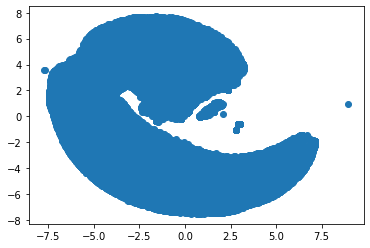

In [75]:
plt.scatter(tsne_results[:,0],tsne_results[:,1])

In [1]:
import scanpy